In [ ]:
!pip install d2l==1.0.0-beta0

Ở phần trước, ta chỉ dựa vào:
- Tensors để lưu trữ dữ liệu và đại số tuyến tính
- Đạo hàm tự động để tính toán độ dốc.

Thực tế, các trình lặp dữ liệu, hàm mất mát, trình tối ưu hóa và các lớp mạng nơ ron đã được các thư viện hiện đại phổ biến cho chúng ta.

Bài này, ta sẽ triển khai mô hình hồi quy tuyến tính từ một API cao cấp của frame học sâu.

In [2]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# 3.5.1. Xác định mô hình

Đối với các hoạt động tiêu chuẩn, chúng ta có thể sử dụng các lớp được xác định trước của khung, cho phép chúng ta tập trung vào các lớp được sử dụng để xây dựng mô hình thay vì lo lắng về việc triển khai chúng.

Trong PyTorch, Fully connected Layers được định nghĩa trong Class Linear và LazyLinear. Với LazyLinear cho phép ta chỉ định kích thước của output, còn Linear thì hỏi có bao nhiêu input.


**Câu hỏi:** Vì sao chỉ định hình dạng đầu vào là bất tiện, có thể yêu cầu tính toán không cần thiết (chẳng hạn như trong các lớp tích chập)

In [3]:
class LinearRegression(d2l.Module):
  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    self.net.weight.data.normal_(mean = 0, std = 0.01)
    self.net.bias.data.fill_(0)

Trong phương thức forward, ta chỉ cần gọi phương thức `__call__` được tích hợp sẵn để tính toán output

In [4]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
  return self.net(X)

# 3.5.2. Xác định hàm mất mát

Class MSELoss tính trung bình của loss bình phương (không có thừa số 1/2). Theo mặc định, MSELoss trả về loss trung bình trên các ví dụ. Nhanh hơn và dễ sử dụng hơn so với việc tự triển khai như bài trước.

In [5]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
  fn = nn.MSELoss()
  return fn(y_hat, y)

#3.5.3. Xác định thuật toán tối ưu hóa

Minibatch SGD là một công tiêu chuẩn để tối ưu hóa mạng nơ ron và PyTorch có hỗ trợ nó. Khi ta khởi tạo, ta chỉ định các tham số để tối ưu như đẩy vào bộ tham số `self.parameters()` và `self.lr`.

In [6]:
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), self.lr)

#3.5.4. Đào tạo

Ta thấy rằng, khi sử dụng các API high level về học sâu thì dòng mã đã ít hơn. Không phải phân bố các tham số riêng lẻ, xác định hàm mất mát hoặc triển khai SGD minibatch.


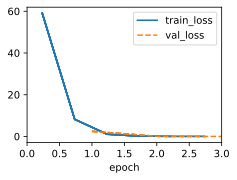

In [10]:
model = LinearRegression(lr = 0.03)
data = d2l.SyntheticRegressionData(w = torch.tensor([5, -8.4]), b = 4.2)
trainer = d2l.Trainer(max_epochs = 3)
trainer.fit(model, data)

In [11]:
@d2l.add_to_class(LinearRegression) 
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0039, -0.0297])
error in estimating b: tensor([0.0125])
